## MODELO PARA LA DETECCION DE FRAUDE BANCARIO

* Modelo desarrollado con Deep learning para detectar casos de fraude interbancario
 
 Los pasos a seguir son:
 
 * Obtencion de los datos
 * Preparacion de datos
      * Exploracion de datos
      * Transformacion de datos
 * Construccion del modelo
 * Evaluacion del modelo

**Ciclo del machine learning** aplicado a este proyecto

![](model_process.png)

*Diagrama de procesos desarrollado en BPMN*

### Obtencion de los datos

* Analizar las fuentes de datos
* Colecta de datos
* Integracion de las fuentes de datos

Como primer paso importamos las librerias para obtener los datos

In [1]:
from tensorflow.keras.utils import get_file
import os

path_file=get_file(
    fname=os.path.join(os.getcwd(),"creditcard.csv"),
    origin="https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv",
    )

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Establecer una semilla (seed) para que los resultados sean reproducibles

In [3]:
seed=42 
np.random.seed(seed)

Procedemos con la carga de los datos

In [4]:
data=pd.read_csv(path_file)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Preparacion de datos

* Exploracion de datos
* Transformacion de datos ( Data wrangling, data cleaning, feature selection y feature extraction)

En esta seccion primero exploramos las informacion de los datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observamos los datos de *float* e *int* para la variable objetivo

* Ahora vamos a obtener los estadisticos de los datos rapidamente

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Verificamos la presencia de datos nulos en los datos

In [8]:
data.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Por cierto **no hay precencia de datos nulos** en dichos datos, entonces vamos a observar su comportamiento

* La columna tiempo no guarda informacion significativa por lo cual la excluiremos del analisis
* Observamos la distribucion de los datos en base a un histograna

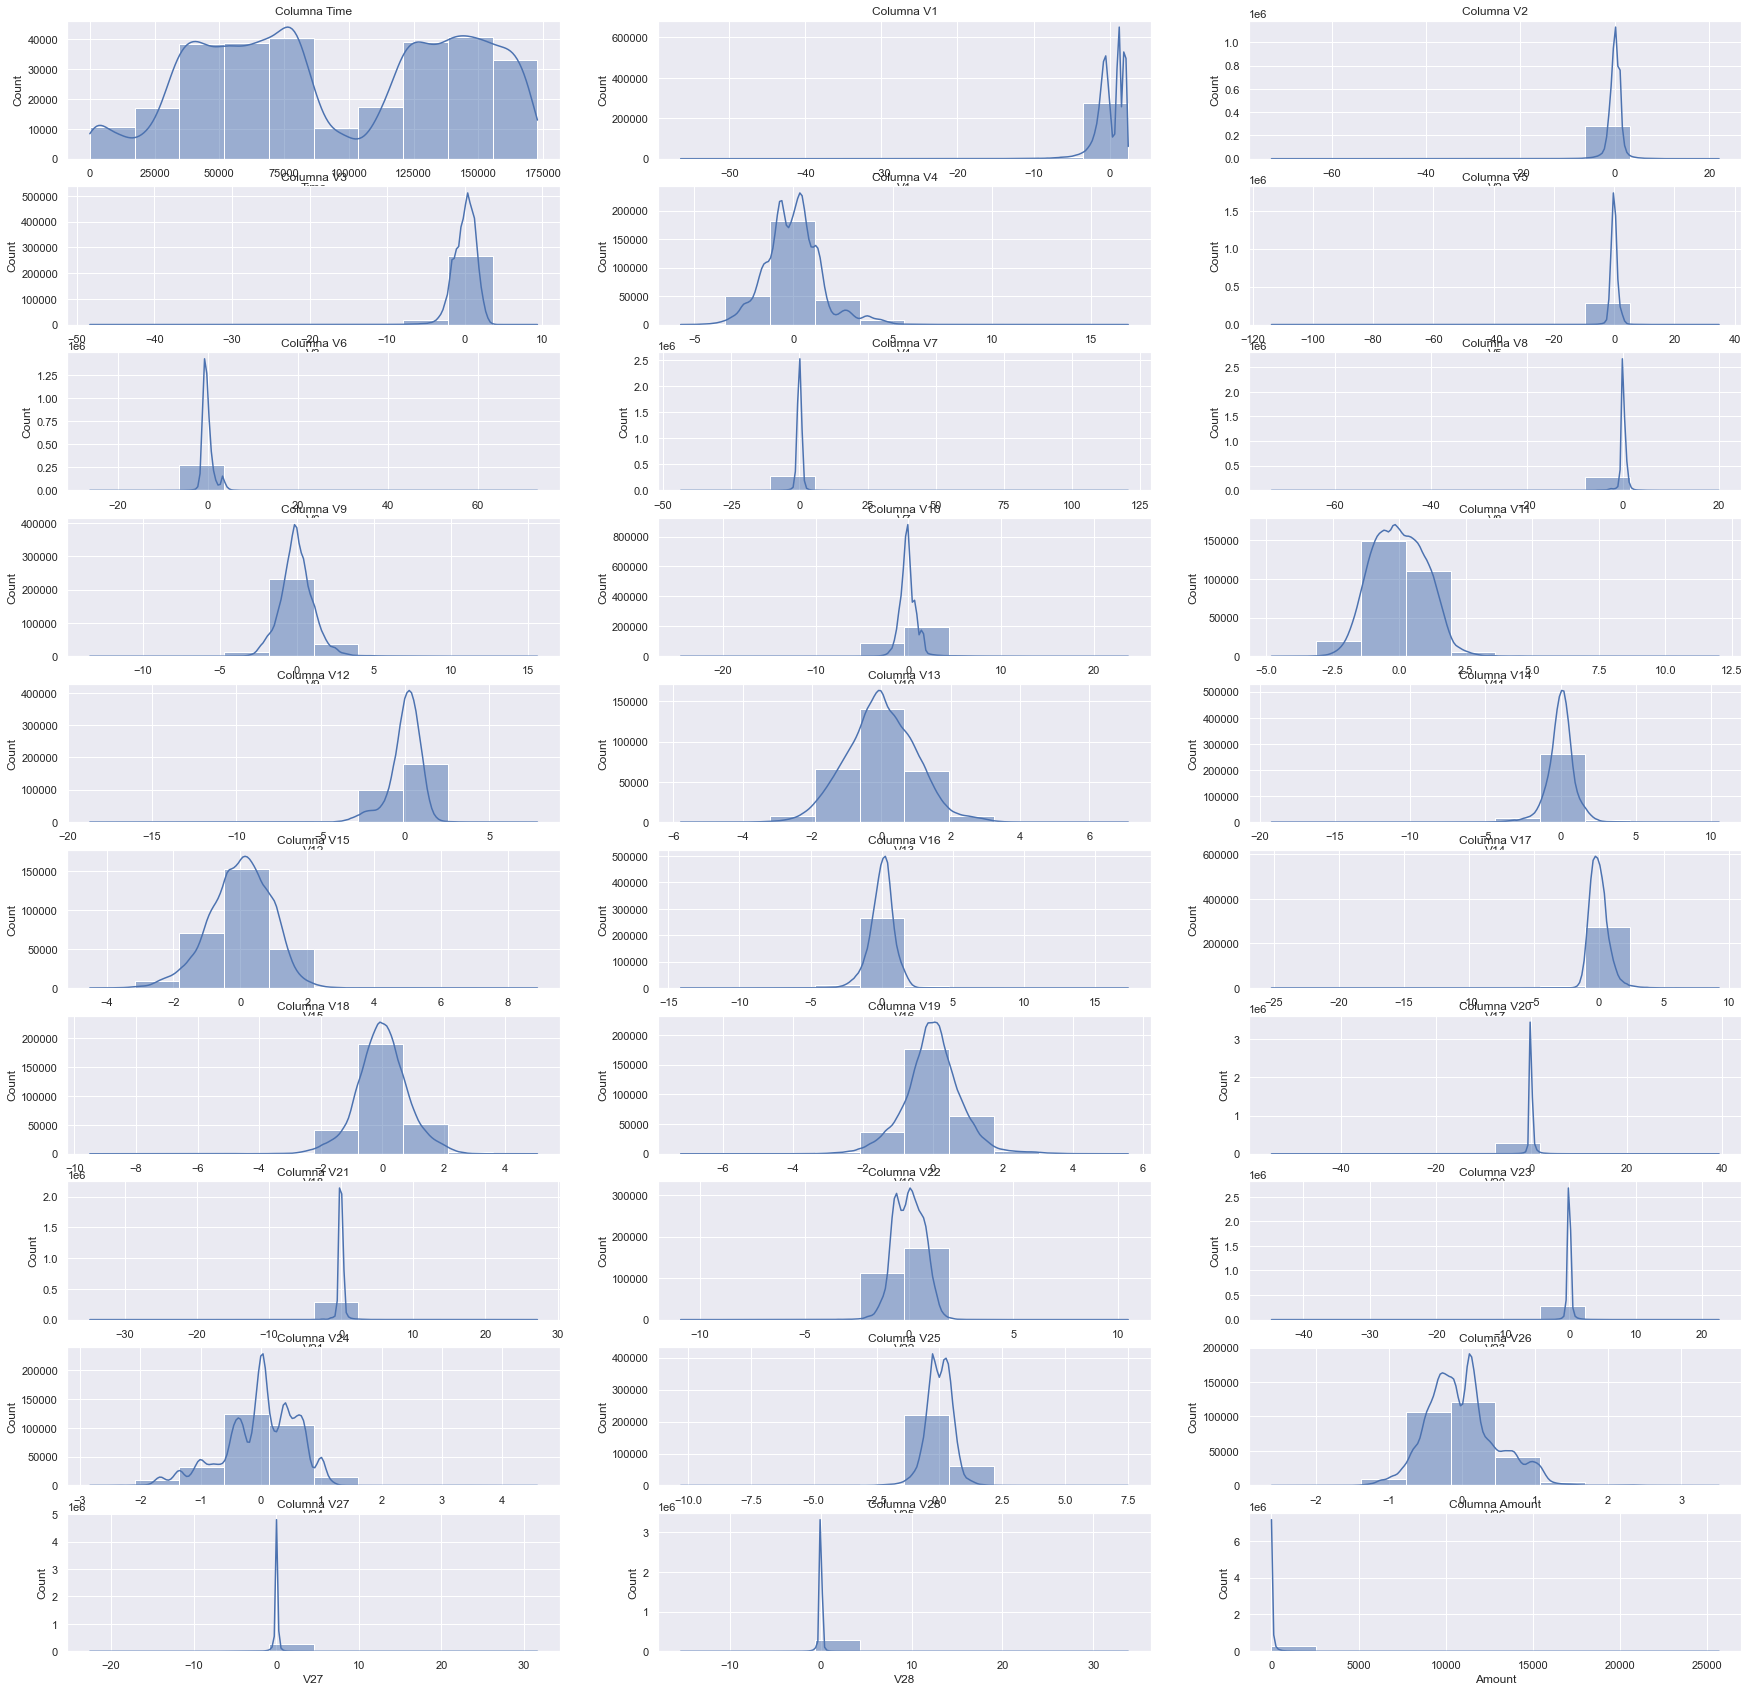

In [9]:
fig,axes=plt.subplots(10,3,sharex=False,figsize=(30,30))
columns_tabla=data.columns

for i, ax in enumerate(axes.flat):
    sns.histplot(data.iloc[:,i],bins=10,kde=True,ax=ax)
    ax.set_title(f"Columna {columns_tabla[i]}")
plt.show()

* Observamos las anomalias de los datos. excluyendo la variable dependiente que pertenece a la columna

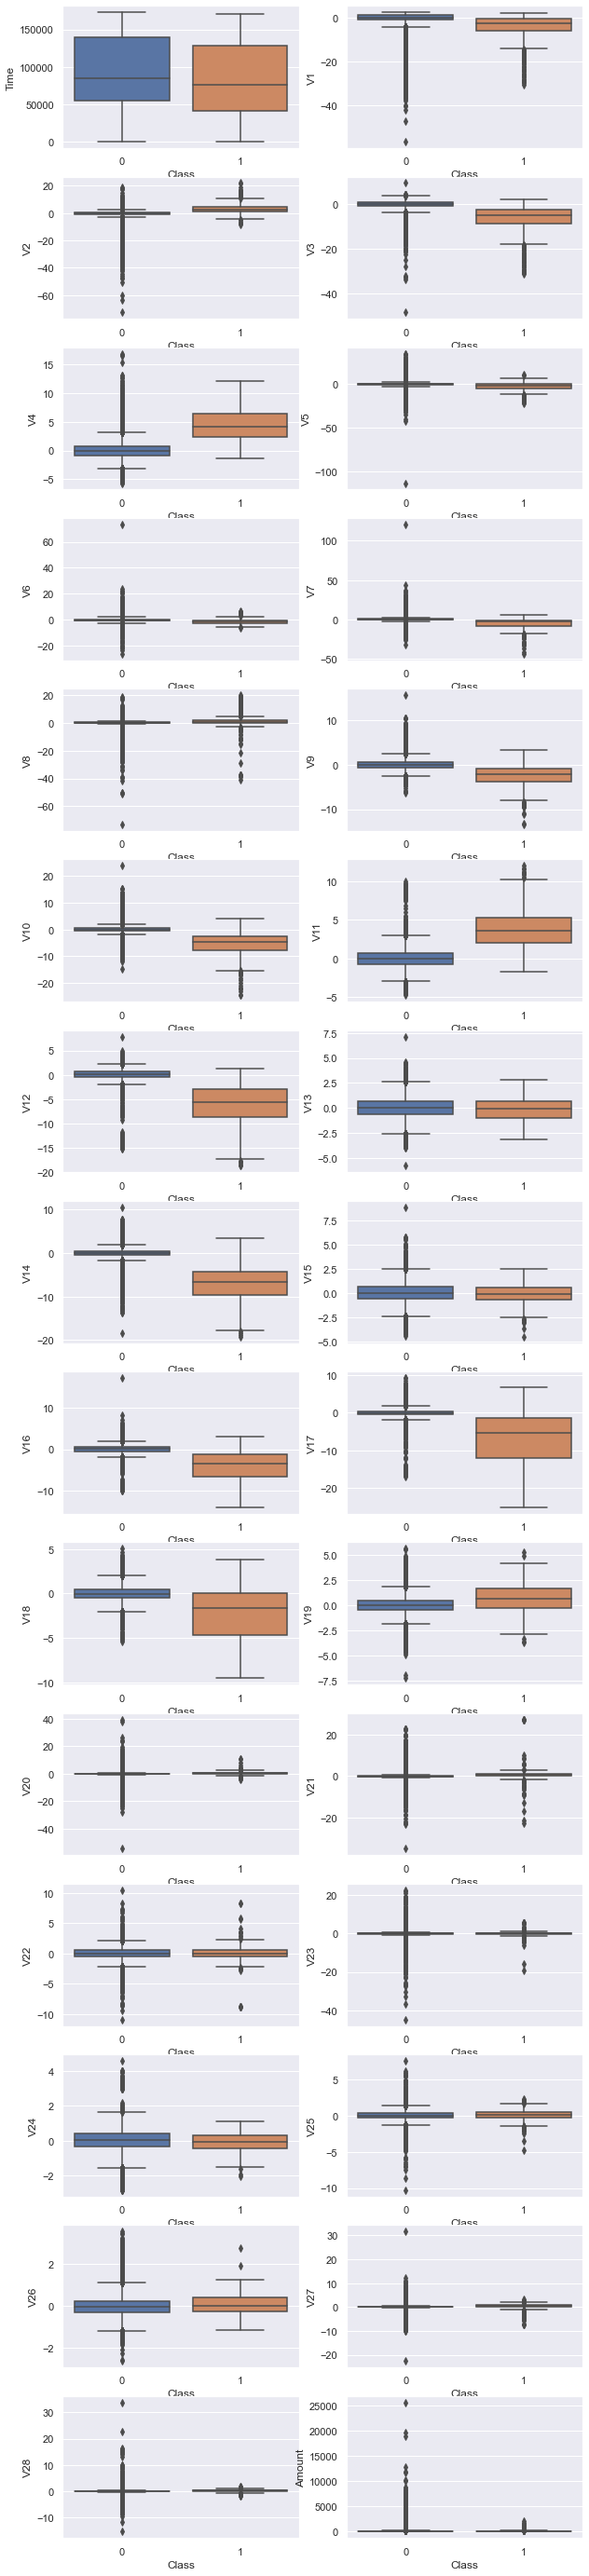

In [10]:
fig,axes=plt.subplots(15,2,figsize=(10,50))
columns_tabla=data.columns

for i,ax in enumerate(axes.flat):
    sns.boxplot(x="Class",y=columns_tabla[i],data=data,ax=ax)

La mayoria de los datos posee anomalias pero en estos casos sabemos que no son malas debido a que tambien corresponden a los casos donde hubo fraude.

Debemos analizar mas detenidamiente estas muestras de anomalias

* Observamos la distribucion de las clases de los datos a taves de todos el set de informacion

0    99.83%
1     0.17%
Name: Class, dtype: object

<AxesSubplot:ylabel='Class'>

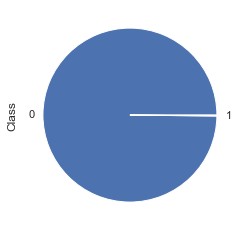

In [11]:
conteo=data.Class.value_counts(normalize=True)
display(conteo.map(lambda x: f"{x*100:0.2f}%"))
plt.rcParams["figure.figsize"]=(4,4)
conteo.plot(kind="pie",)

Tenemos como clase mayoritaria dominante los casos que no fueron fraude financiero con un 99.83% del total de datos,
mientras que la minoria se corresponde con lo que queremos obtener (0.17%).

Este es un verdadero problema de desbalanceamiento de clases.Debido que el modelo aprendera mas de los datos de la clase mayoritaria que la de la clase minoritaria correspondiente a los fraude detectados.

* Observamos las tendencias de los datos

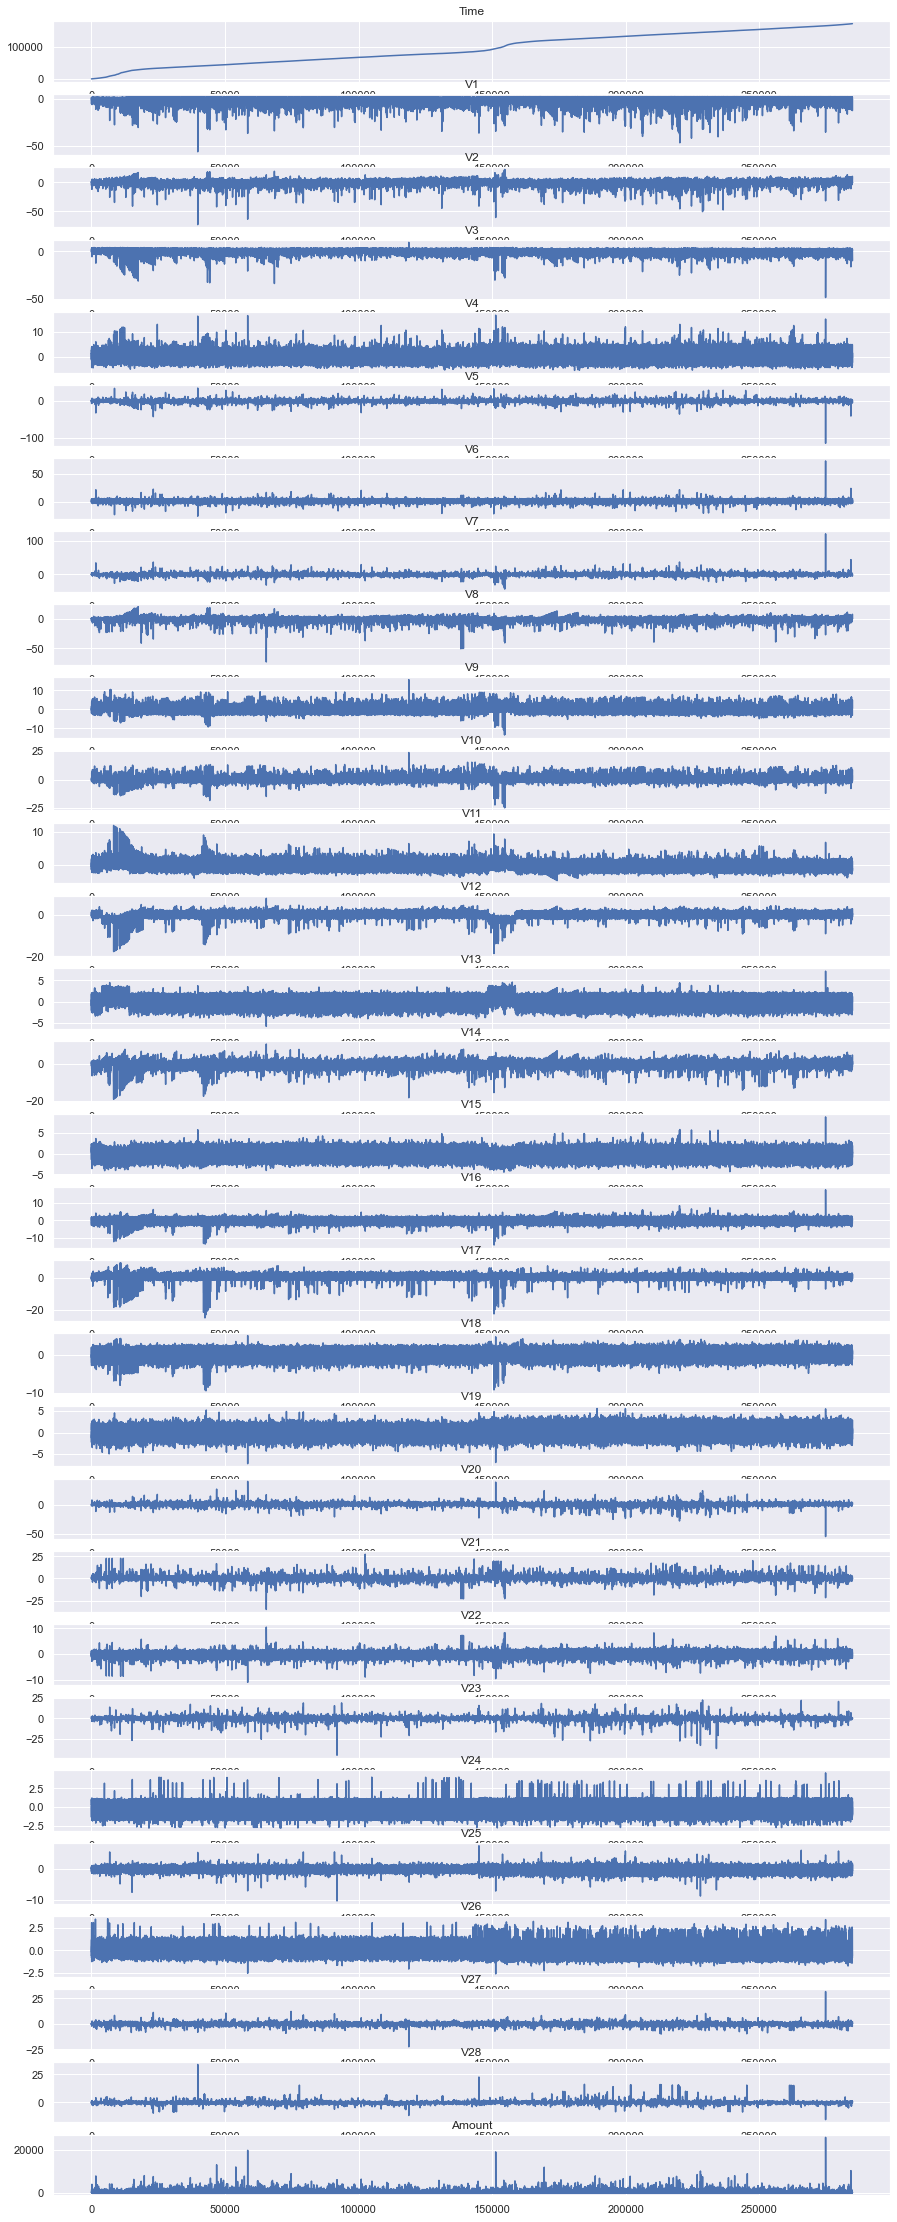

In [12]:
fig,axes=plt.subplots(30,1,figsize=(15,40))

for i , ax in enumerate(axes.flat):
    ax.plot(data.iloc[:,i])
    ax.set_title(data.columns[i])
plt.show()

In [13]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] #reseteamos la configuracion del tamaño del grafico

* Analizamos la correlacion de las variables. Esto es muy importante para evitar la colinealidad en los datos

<AxesSubplot:>

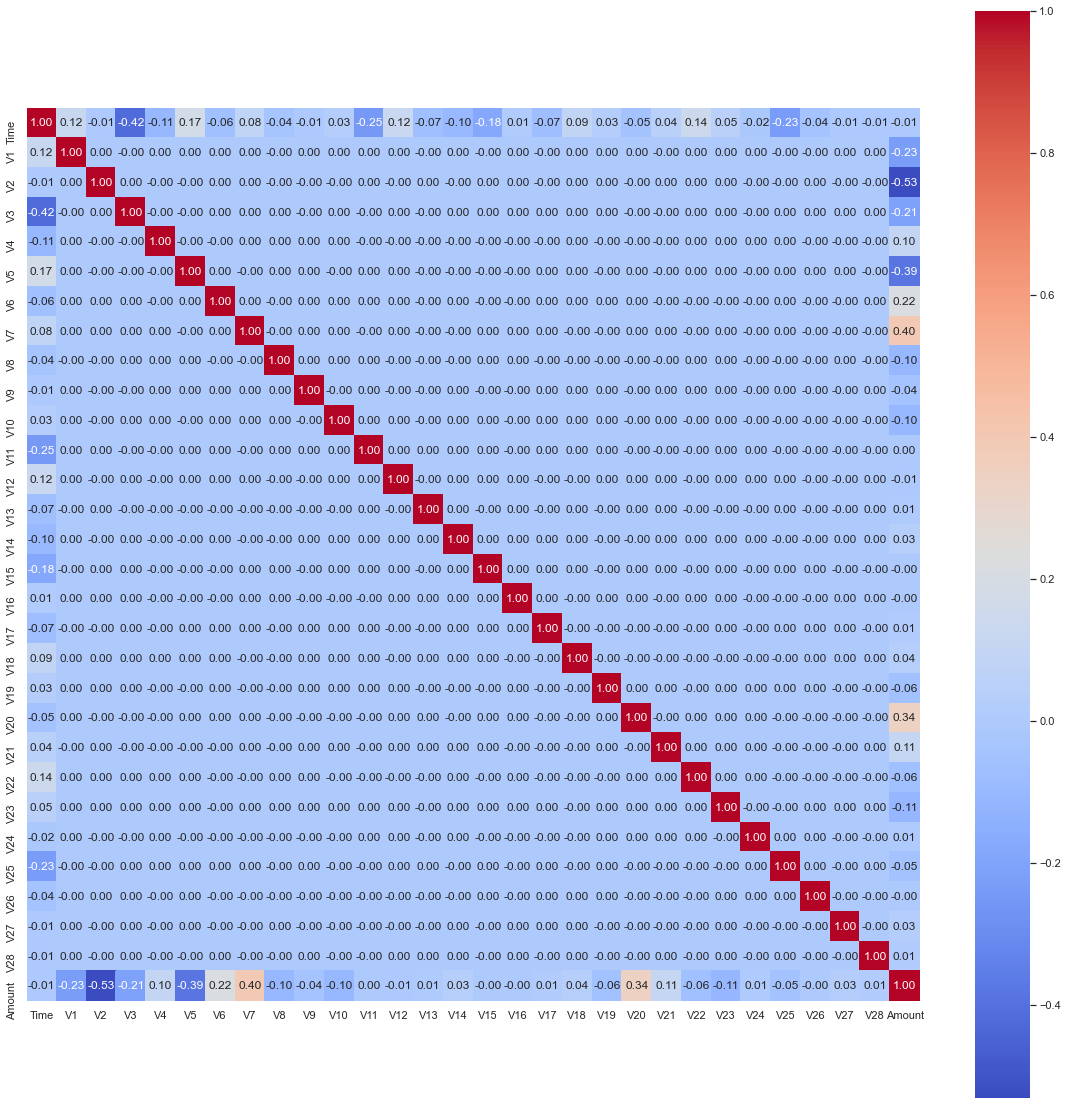

In [14]:
corr=data.iloc[:,:-1].corr(method="pearson") 

plt.figure(figsize=(20,20))
sns.heatmap(corr.T,fmt="0.2f",annot=True,square=True,cmap="coolwarm")


Buscamos la **colinealidad** entre las variables, esto se da cuando dos variables estan correlacionadas entre si. Por otro lado tambien podemos encontrar la **Multicolinealidad** cuando mas de una variable indepediente se encuentra correlacionada

Las correlaciones encontradas fueron las siguientes:

* **V1** y **Amount** estan levemente correlacionadas con un coeficiente de correlacion de **-0.23**. Esto es una correlacion inversa que significa que el aumento de una tiene una disminucion en el valor del otro par.

In [15]:
from scipy.stats import pearsonr

Creamos una funcion que calcule la correlacion entre dos variables y nos entregue a traves de un nivel de significancia si la correlacion es estadisticamente siginficativa

In [16]:
def test_correlation(X1,X2,alpha=0.05):
    corr,p_valor=pearsonr(X1,X2) #comprobamos la correlacion entre X1 y X2
    #Utilizamos el p_valor para determinar si el coeficiente de correlacion es estadisticamente significativo
    #si el p_valor (alfa) es menor o igual al nivel de significacia 0.05 entonces la correlaciones estadisiticamente significativa.

    print(f"COEF. correlacion: {corr}   | p-valor : {p_valor}")
    print("La correlacion es estadisticamente significativa" if p_valor<=alpha else "La correlacion NO es significativa")

In [17]:
#ejecutamos el test de correlacion
test_correlation(data.V1,data.Amount)

COEF. correlacion: -0.2277086529224042   | p-valor : 0.0
La correlacion es estadisticamente significativa


Text(0.5, 1.0, 'V1 vs Amount')

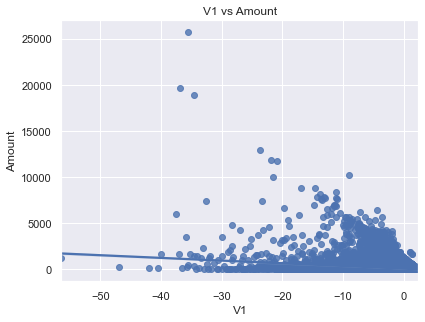

In [18]:
sns.regplot(x="V1",y="Amount",data=data)
plt.title("V1 vs Amount")

Concluimos que V1 y Amount tienen una correlacion estadisticamente significativa

* **V2** y **Amount** estan moderadamente correlacionadas con un coeficiente de correlacion negativa de -0.53. Por lo cual tambien demostramos que estan significativamente correlacionados

In [19]:
test_correlation(data.V2,data.Amount)


COEF. correlacion: -0.5314089393280333   | p-valor : 0.0
La correlacion es estadisticamente significativa


Text(0.5, 1.0, 'V2 vs Amount')

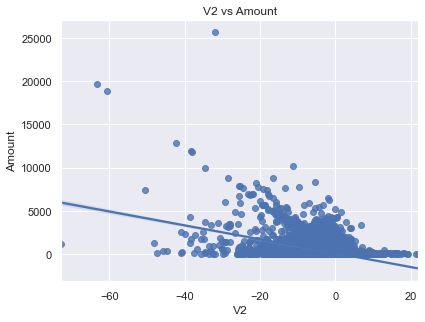

In [20]:
sns.regplot(x="V2",y="Amount",data=data)
plt.title("V2 vs Amount")

* Tenemos la correlacion entre las variable independiente V3 con Time (-0.42) y Amount (-0.21)
* Descartamos la variable Time de este analisis debido a que el tiempo desde ya no aporta al modelo y sera exluido mas adelante

Por lo tanto probamos la correlacion entre **V3** y **Amount** y concluimos tambien que tienen una correlacion significativa

In [21]:
test_correlation(data.V3,data.Amount)

COEF. correlacion: -0.21088047528990986   | p-valor : 0.0
La correlacion es estadisticamente significativa


Text(0.5, 1.0, 'V3 vs Amount')

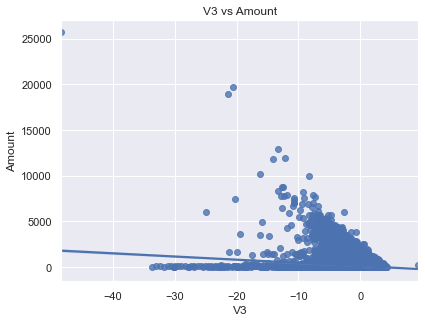

In [22]:
sns.regplot(x="V3",y="Amount",data=data)
plt.title("V3 vs Amount")

* La **V4** no se encuentra muy correlacionada con las demas variables, esta variable puede ser buena
* La **V5** se encuentra correlacionada con **Amount**


In [23]:
test_correlation(data.V5,data.Amount)

COEF. correlacion: -0.38635625616306024   | p-valor : 0.0
La correlacion es estadisticamente significativa


Text(0.5, 1.0, 'V5 vs Amount')

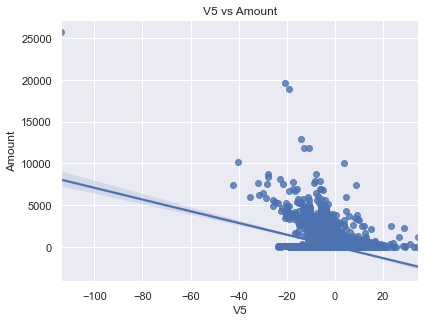

In [24]:
sns.regplot(x="V5",y="Amount",data=data)
plt.title("V5 vs Amount")

* La **V6** se encuentra correlacionada con **Amount**

In [25]:
test_correlation(data.V6,data.Amount)

COEF. correlacion: 0.2159811802252792   | p-valor : 0.0
La correlacion es estadisticamente significativa


Text(0.5, 1.0, 'V6 vs Amount')

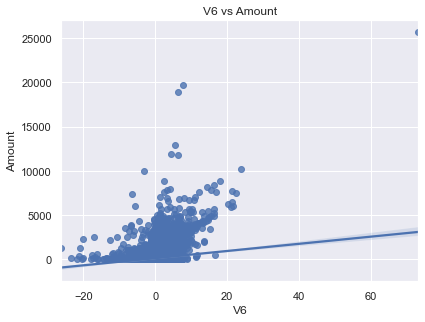

In [26]:
sns.regplot(x="V6",y="Amount",data=data)
plt.title("V6 vs Amount")

* La **V7** se encuentra correlacionada con **Amount**

In [27]:
test_correlation(data.V7,data.Amount)

COEF. correlacion: 0.39731127818168943   | p-valor : 0.0
La correlacion es estadisticamente significativa


Text(0.5, 1.0, 'V7 vs Amount')

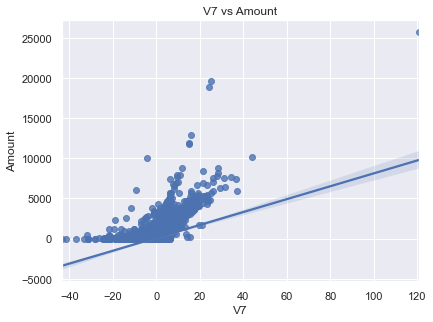

In [28]:
sns.regplot(x="V7",y="Amount",data=data)
plt.title("V7 vs Amount")

* Por ultimo tambien notamos una correlacion significativa entre **V20** y **Amount**

In [29]:
test_correlation(data.V20,data.Amount)

COEF. correlacion: 0.33940340454617346   | p-valor : 0.0
La correlacion es estadisticamente significativa


Text(0.5, 1.0, 'V20 vs Amount')

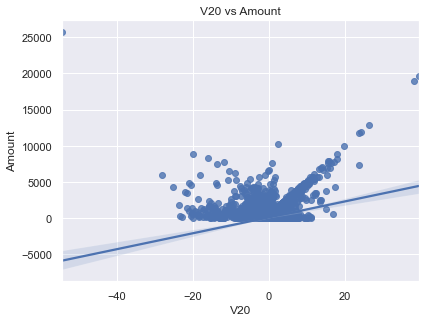

In [30]:
sns.regplot(x="V20",y="Amount",data=data)
plt.title("V20 vs Amount")

* El resto de variables se excluyeron de este analisis debido a que en la matriz de correlacion no tuvieron coeficientes de correlacion muy buenos con respecto a otras variables

Ahora realizaremos analisis orientados a una preparacion de datos

In [31]:
#analizamos el rango de cada variable en el dataset esto es para ver sus limites y poder realizar un escalamiento de datos mas adelanta
data.aggregate([np.min,np.max]).T

,amin,amax
Time,0.000000,172792.000000
V1,-56.407510,2.454930
V2,-72.715728,22.057729
V3,-48.325589,9.382558
V4,-5.683171,16.875344
V5,-113.743307,34.801666
V6,-26.160506,73.301626
V7,-43.557242,120.589494
V8,-73.216718,20.007208
V9,-13.434066,15.594995


Podemos observar que el rango de datos se encuentra muy disperso como tambien existen columnas como **Time** y **Amount** que poseen rango mas anchos debido a los dato que manejan. Esto amerita que luego que los datos esten preparados se escalen los datos para que posean un rango comun

* Podemos esforzarnos y buscar **outliers** pero en este contexto de fraude bancario a aveces las anomalias en casos de fraude son las que nuestro modelo debe predecir para ajustarnos correctamente a los datos. Ahora tambien con respecto a los casos de no fraude, es normal que los clientes retiren cantidades infimas y luego cantidades grandes despues de un periodo largo de tiempo. En este contexto penalizar los outliers no es una buena idea.

Ahora examinemos otro problema comun en los datos. Los **valores duplicados**.

In [32]:
mask_duplicated=data.duplicated(subset=None) #devuelve la cantidad de valores duplicados en funcion de todas las columnas 
print(mask_duplicated.sum())

1081


Como parte de nuestro analisis podemos saber cuales son esas filas duplicadas, para ellos hacemos uso de la matriz booleana de enmascaramiento devuelta como resultado

In [33]:
data[mask_duplicated].head() #mostramos los 5 primeras filas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


* Es sorprendente saber de la existencia de **1081 datos duplicados**. Estos se eliminaran en la fase de procesamiento de datos

Ahora veamos la distribucion de de clases contenidas en dichos datos duplicados

In [34]:
data[mask_duplicated].Class.value_counts()

0    1062
1      19
Name: Class, dtype: int64

Ahora bien, puede que estas transacciones no vengan de un mismo cliente y que sea casualidad que tengan las mismas caracteristicas, como tambien de que hubiera una fuga en la base de datos y se duplicaron algunas transacciones a la misma hora. En ambos casos se debe retirar del conjunto de datos mas adelante

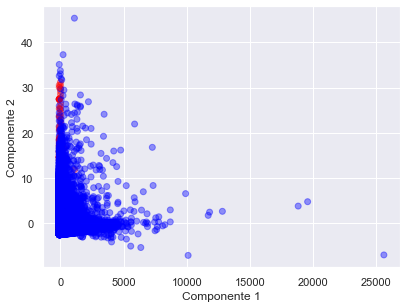

In [56]:
#observamos la dispersion de los datos a traves del analisis de componentes principales
from sklearn.decomposition import PCA

#creo una funcion para mostrar la dispersion de clases por cada dataset

def plot_scatter_by_class(ax=None,data=None):
    pca=PCA(n_components=2)
    XY=pca.fit_transform(data.iloc[:,1:-1]) #excluimos el Time y la columna Class

    color_map=np.array(["blue","red"])[data.Class] #Los No fraudes son Azules,y fraudes rojos
    if ax is None:
        _,(ax)=plt.subplots(1,1)
    ax.scatter(XY[:,0],XY[:,1],color=color_map,alpha=0.4)
    ax.set_ylabel("Componente 2")
    ax.set_xlabel("Componente 1")
    
    
plot_scatter_by_class(data=data)

**Otros pasos**

Las caracteristicas de entrada son continuas y la salida es categorica. Por lo tanto no necesitamos realizar algun procesamiento adicional de condificacion en caliente u ordinales


### PROCESAMIENTO DE DATOS

* Ya estamos listos para aplicar tecnicas de procesamiento de datos.

En primer lugar desde un inicio notamos que la columna tiempo no aporta valor, ya que solo apunta a la hora donde se realizo dicha transaccion.

In [44]:
df_cleaned=data.copy() #los datos de analisis los copiamos al dataframe de limpeza para empezar con el proceso

In [45]:
#procedemos a eliminar las columnas con valors duplicados detectados en la exploracion de datos

mask_duplicated=df_cleaned.duplicated(subset=None) #subset=None para considerar todas las columnas para evaluar la duplicidad
mask_duplicated.sum()

1081

In [46]:
df_cleaned=df_cleaned.drop_duplicates(subset=None) #borramos los duplicados

In [47]:
df_cleaned.drop("Time",axis=1,inplace=True) #borramos la columna tiempo. No aportaba al modelo

Las variables **V1,V2,V3,V5,V6,V7 ... V20**. Estaba correlacionadas con Amount pero no a un alto nivel mayor a 0.70, debido a que es normal que las caracteristicas flutuen generando un poco de correlacion, no podemos eliminarlas por ser colineales porque su coeficiente no era muy elevado como para eliminar una y dejar otra, cada quien tenia sus particularidades.

Estas variables no se eliminan en esta fase (*)

(*) Si el modelo no tiene mejoras podemos regresar a la fase de exploracion y analisis para considerar eliminar dichas variables. El proceso de machine learning es iterativo

#### El problema de datos desbalanceados (99+% No fraude | 1% Si Fraude)

Tener datos desbalanceados hace sesgar los resultados del modelo, debido a que se familiarizara mas con la clase mayoritaria que acabara prediciendo muy buenos datos sobre esta, que en lugar de la clase minoritaria.

A continuacion tenemos la proporcion actual

In [48]:
print("====Conteo de Clases====")
display(df_cleaned.Class.value_counts())
print("====Proporcion de clases====")
display(df_cleaned.Class.value_counts(normalize=True).map(lambda x: f"{x:0.10f}%"))

====Conteo de Clases====


0    283253
1       473
Name: Class, dtype: int64

====Proporcion de clases====


0    0.9983328986%
1    0.0016671014%
Name: Class, dtype: object

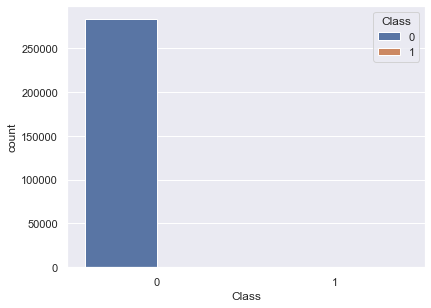

In [49]:
ax=sns.countplot(x="Class",hue="Class",data=df_cleaned)

##### Primer camino: Submuestreo

Esta es una tecnica para reducir la proporcion de la clase mayoritaria para que este al nivel de la minoritaria, tal que al final el proceso, los datos se reducen al nivel de esta ultima.

In [50]:
#Nuestro conjunto de datos estaba desequilibrado con el 99% de clase negativa y 1% positiva en fraude.
#En este caso tenemos que hacer un submuestreo en favor a la clase minoritaria(nuestro objetivo), para que se equilibren los datos y el modelo no nos arroje metricas sesgadas

from imblearn.under_sampling import RandomUnderSampler

undersampling=RandomUnderSampler(random_state=42)
X_sample,y_sample=undersampling.fit_resample(df_cleaned.iloc[:,:-1],df_cleaned.iloc[:,-1]) #allfeatures , labels


In [51]:
y_sample.value_counts() #proporcion de datos luego de submuestreo

1    473
0    473
Name: Class, dtype: int64

Concatenamos los conjuntos de datos en un solo set

In [53]:
data_undersampled=pd.concat([X_sample,y_sample],axis=1)

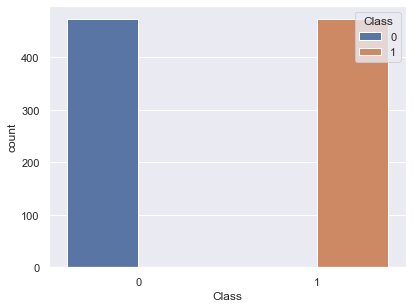

In [54]:
ax=sns.countplot(x="Class",hue="Class",data=data_undersampled)

Mostramos la dispersion de estos datos

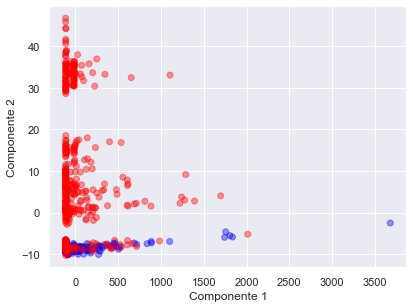

In [57]:
plot_scatter_by_class(data=data_undersampled)

Guardamos los datos procesados en entrenamiento/test. OJO: No se realizo el escalado de datos

In [68]:
from sklearn.model_selection import train_test_split

def save_balanced_data(data,name=None):
    import os
    columns=data.columns
    x_train,x_test,y_train,y_test=train_test_split(data.values[:,:-1],data.values[:,-1],test_size=0.3,stratify=data.values[:,-1])
    train_data=np.concatenate([x_train,y_train.reshape(-1,1)],axis=1)
    test_data=np.concatenate([x_test,y_test.reshape(-1,1)],axis=1)
    #los transformo en dataframe y los guardo
    os.makedirs(f"./{name}",exist_ok=True)
    pd.DataFrame(train_data,columns=columns).to_csv(f"./{name}/train.csv",index=False)
    pd.DataFrame(test_data,columns=columns).to_csv(f"./{name}/test.csv",index=False)
    print(f"./{name}/train.csv Guardado correctamente")
    print(f"./{name}/test.csv Guardado correctamente")
    
save_balanced_data(data_undersampled,name="creditcard_undersampling")

./creditcard_undersampling/train.csv Guardado correctamente
./creditcard_undersampling/test.csv Guardado correctamente


##### Segundo Camino: Mantener la proporcion de datos y centrarse en las metricas

Aqui dejamos los datos sin balancear para poder utilizarlos directamente en el modelo y evaluarlos con metricas como **Recall, F1, Precision**.

In [69]:
save_balanced_data(df_cleaned,name="creditcard_imbalanced")

./creditcard_imbalanced/train.csv Guardado correctamente
./creditcard_imbalanced/test.csv Guardado correctamente


Los conjuntos balanceados como no balanceados se guardaron correctamente. Existen ahora dos posibles cambinos ya mencionados.

* Si el modelo no tiene buenos resultados en la evaluacion con un conjunto,entonces tenemos otro. De esta manera medimos el impacto de la transformacion de datos en el modelo

##### 3ER Camino: Sobremuestreo de datos

* Para ello haremos un sobremuestreo usando la funcion SMOTE de la libreria imbalanced learn

In [70]:
from imblearn.over_sampling import SMOTE
 
smt=SMOTE(random_state=42)
x_sampled,y_sampled=smt.fit_resample(df_cleaned.iloc[:,:-1],df_cleaned.iloc[:,-1])
np.unique(y_sampled,return_counts=True)

(array([0, 1], dtype=int64), array([283253, 283253], dtype=int64))

In [71]:
data_oversampled=pd.concat([x_sampled,y_sampled],axis=1)

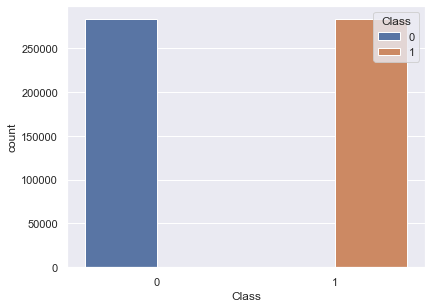

In [73]:
ax=sns.countplot(x="Class",hue="Class",data=data_oversampled)

Como podemos ver los datos se emparejaron los de mayor muestra, por lo que tambien decidimos guardar una muestra

In [74]:
save_balanced_data(data_oversampled,name="creditcard_oversampling")

./creditcard_oversampling/train.csv Guardado correctamente
./creditcard_oversampling/test.csv Guardado correctamente


## Modelado 

* Esta fase se realiza en otro notebook, pero por temas de presentacion se realizara en el mismo.

Cuando queremos empezar a modelar, primero cargamos los datos.

* Definir la tecnica de modelado : Redes neuronales MLP
* Construir el modelo
* Validar el modelo

In [75]:
import numpy as np
import pandas as pd
#establecer una semilla para reprudicibilidad de resultados
seed=42
seed=np.random.seed(seed)

In [4]:
def load_data(name=None):
    
    data=pd.read_csv(name).values
    return data[:,:-1],data[:,-1] #retornamos los conjuntos (features,labels)

In [93]:
x_train,y_train=load_data("./creditcard_imbalanced/train.csv") #cargamos los datos de entrenamiento

Dividimos los datos en pliegues de entrenamiento y validacion; para luego escalarlos

In [92]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler


def partition_data(X,y,with_scale=False,split_size=0.2):
    """
    Esta es una funcion generica que divide los datos en dos sets balanceados y luego da la opcion de escalarlos.
    El motivo de esta funcion es para ahorrar lineas de codigo en este proyecto complejo y usarlas con facilidad
    
    X: Conjunto de caracteristicas en matrices numpy
    y: Etiquetas de prediccion en matrices numpy
    
    Return:
    (x_train,x_val,y_train,y_val) si with_scale=False
    (scale,x_train,x_val,y_train,y_val) si with_scale=True, devolviendo el objeto escalador 'scaler' """
    
    x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=split_size,random_state=42,shuffle=True,stratify=y)
    
    if with_scale:
        scaler=MinMaxScaler(feature_range=(0,1))
        scaler.fit(x_train,y_train);

        x_train=scaler.transform(x_train)
        x_val=scaler.transform(x_val)
        
        return scaler,x_train,x_val,y_train,y_val
    
    return x_train,x_val,y_train,y_val

In [94]:
scaler_imb,x_train,x_val,y_train,y_val=partition_data(x_train,y_train,with_scale=True,split_size=0.2) #20% de datos de validacion

A continuacion comenzamos a construir el modelo, para ellos cargamos las librearias inciales y herramientas para su implementacion

In [95]:
%load_ext tensorboard
import tensorflow as tf

In [96]:
#primero cargamos las metricas del modelo
metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Recall(name="recall"),
    ]
    

### CONSTRUCCION DEL MODELO BASE

El modelo base tiene como objetivo mostrar una prediccion inicial de los datos, para que luego un modelo posterior se desarrolle teniendo en cuenta que tiene que tener un puntaje mayor al obtenido por el base

In [103]:
n_features=x_train.shape[1] #obtenemos el numero de caracteristicas

def build_model(metrics=metrics):
    
    #arquitectura del modelo
    
    model=tf.keras.models.Sequential(name="MODEL_SEQUENTIAL")
    
    model.add(tf.keras.Input(shape=(n_features,),name="Input"))
    model.add(tf.keras.layers.Dense(64,activation="relu",name="DENSEx64")) #para evitar cuellos de botella se elige un valor mayor al de la dimension de entrada
    
    model.add(tf.keras.layers.Dense(1,activation="sigmoid",name="Output"))
    
    #la configuracion de compilacion del modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=metrics
                 )
    return model

Mostramos la arquitectura del modelo base.

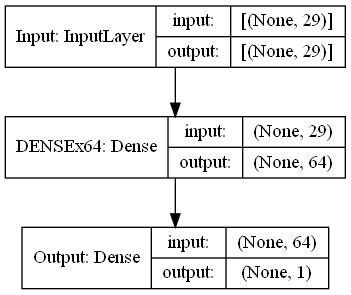

In [98]:
from tensorflow.keras.utils import plot_model

base_model=build_model()
plot_model(base_model,"base_model.png",show_shapes=True)

Vemos la descripcion de la capas y el numero de parametros entrenables

In [99]:
base_model.summary()

Model: "MODEL_SEQUENTIAL"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DENSEx64 (Dense)             (None, 64)                1920      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


Ahora establecemos **callbacks** tanto para detener el proceso de entrenamiento si no se obtienen buenos resultados por un numero determinado de epocas. Como tambien para obtener graficas del progeso del modelo durante el entrenamiento segun las epocas

In [100]:
early_stop=tf.keras.callbacks.EarlyStopping(
                                            monitor="val_loss", #monitorizamos la funcion de perdida
                                            patience=10,
                                    )

In [104]:
#callbacks para las graficas
def get_callback_tensorboard(name=None):
    import time
    
    name= int(time.time()) if name is None else f"{name}_{int(time.time())}" #guardo el nombre y el tiempo
    log_dir=f"./tensorboard/fraud_detection/{name}"
    tb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    return tb

In [106]:
BATCH_SIZE=64
base_model=build_model()
tensorboard_callbacks=get_callback_tensorboard("baseline")
history=base_model.fit(x_train,y_train,epochs=100,batch_size=BATCH_SIZE,validation_data=(x_val,y_val),callbacks=[early_stop,tensorboard_callbacks])

Epoch 1/100
2483/2483 [==============================] - 5s 2ms/step - loss: 0.0282 - accuracy: 0.9988 - recall: 0.2991 - val_loss: 0.0078 - val_accuracy: 0.9984 - val_recall: 0.0303
Epoch 2/100
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0076 - accuracy: 0.9984 - recall: 0.1698 - val_loss: 0.0052 - val_accuracy: 0.9989 - val_recall: 0.4242
Epoch 3/100
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0057 - accuracy: 0.9987 - recall: 0.3551 - val_loss: 0.0044 - val_accuracy: 0.9991 - val_recall: 0.5303
Epoch 4/100
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0039 - accuracy: 0.9991 - recall: 0.5738 - val_loss: 0.0043 - val_accuracy: 0.9991 - val_recall: 0.5303
Epoch 5/100
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0040 - accuracy: 0.9993 - recall: 0.6681 - val_loss: 0.0039 - val_accuracy: 0.9992 - val_recall: 0.5909
Epoch 6/100
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0036 -

Obtenemos algunas graficas de rendimiento tanto en recall como loss. Para ver mas graficas tenemos a **tensorboard** que es mucho mejor que una version estatica de matplotlib.

In [121]:
def plot_metrics(history,metrics=["accuracy","val_accuracy"],kind_type="line",ax=None):
    import pandas as pd #por si no esta previamente importada
    data_metrics=pd.DataFrame(history)
    if ax is None:
        _,(ax)=plt.subplots(1,1)
    ax.set_title(" vs ".join(metrics))
    ax.set_xlabel("Numero de epocas")
    ax.set_ylabel("Valor de metrica")
    data_metrics[metrics].plot(kind=kind_type,ax=ax)
    

* Veamos el contraste de el accuracy en entrenamiento y validacion

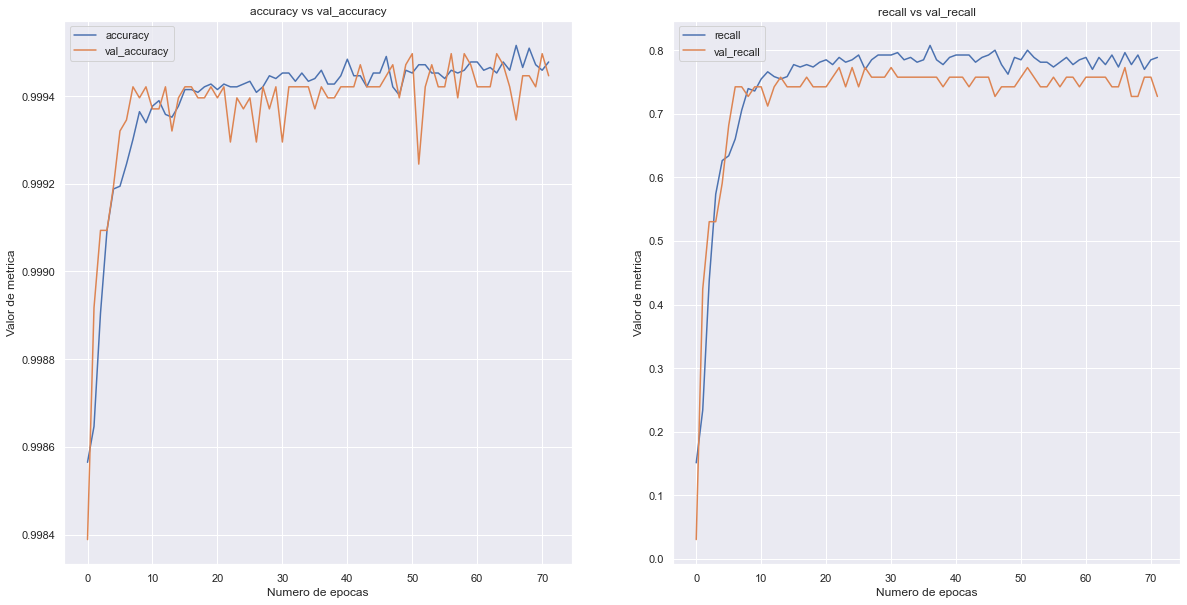

In [127]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

plot_metrics(history.history,metrics=["accuracy","val_accuracy"],kind_type="line",ax=ax1)
plot_metrics(history.history,metrics=["recall","val_recall"],kind_type="line",ax=ax2)

Veamos la evolucion de la funcion de perdida

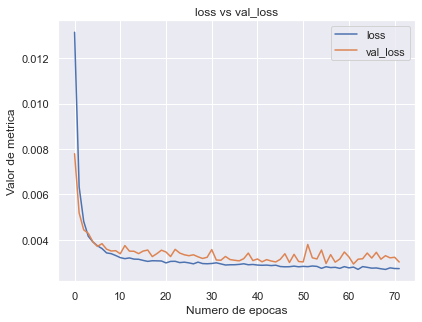

In [126]:
plot_metrics(history.history,metrics=["loss","val_loss"])

#### Validacion: MODELO BASE

In [149]:
base_model.evaluate(x_val,y_val)

1242/1242 [==============================] - 1s 763us/step - loss: 0.0030 - accuracy: 0.9994 - recall: 0.7273


[0.003015657654032111, 0.9994461536407471, 0.7272727489471436]

Evaluamos el  modelo en el conjunto de validacion y obtenemos un **accuracy 99.99%** y **recall 72%**

Le agregamos metricas classificacion para ver el **rendimiento sobre los datos de validacion**

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()

#ahora creamos una funcion que nos muestra la matriz de confusion y el reporte de clasificacion

def display_report_and_matrix_confusion(model,X,y):
    
    y_pred=model.predict(X)
    y_pred=np.where(y_pred>=0.5,1,0) #establecemos el umbral como 0.5
    report=classification_report(y,y_pred)
    print("REPORTE DE CLASIFICACION")
    print(report)
    print("\n Matriz de confusion")
    mat=confusion_matrix(y,y_pred)
    sns.heatmap(mat,annot=True,square=True,fmt="0.4f")
    plt.show()

vemos la matriz de confusion para ver como van los resultados

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     39656
         1.0       0.92      0.73      0.81        66

    accuracy                           1.00     39722
   macro avg       0.96      0.86      0.91     39722
weighted avg       1.00      1.00      1.00     39722


 Matriz de confusion


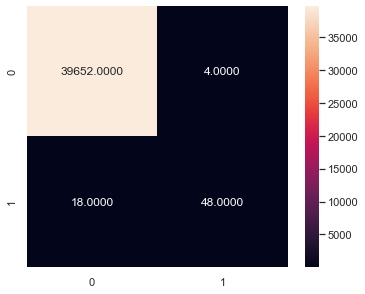

In [151]:
display_report_and_matrix_confusion(base_model,x_val,y_val)

El modelo base tiene buenos resultados en el conjunto de validacion. Al ser bueno lo llevaremos a la semifinal de modelos si logra pasar las expectativas en el conjunto de **Test**.

Entonces para ellos cargamos los datos de **Test** para evaluarlos y ver la realidad

#### EVALUACION DEL MODELO: MODELO BASE

* Esta etapa solo es necesaria si es que el modelo tiene buen rendemiento en los datos de validacion y es definitivo, en caso contrario se necesita explorar nuevas configuraciones y arquitecturas del modelo.Hasta lograr un puntaje decente que conlleve al equilibrio entre el subajuste y sobreajuste

In [136]:
x_test,y_test=load_data("./creditcard_imbalanced/test.csv")

In [137]:
x_test=scaler_imb.transform(x_test) #los escalamos con los datos de entrenamiento

Evaluamos el modelo

In [139]:
base_model.evaluate(x_test,y_test)

2660/2660 [==============================] - 2s 819us/step - loss: 0.0034 - accuracy: 0.9993 - recall: 0.6549


[0.003442350309342146, 0.9993420839309692, 0.6549295783042908]

Estamos viendo como tiene una **precision del 99%**  pero al final un **recall de 65%**

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     84976
         1.0       0.93      0.65      0.77       142

    accuracy                           1.00     85118
   macro avg       0.96      0.83      0.88     85118
weighted avg       1.00      1.00      1.00     85118


 Matriz de confusion


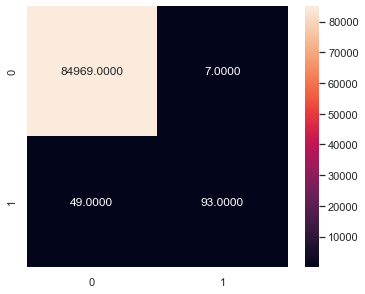

In [152]:
display_report_and_matrix_confusion(base_model,x_test,y_test)

Nada mal para ser el modelo base con solo 49 falsos negativos luego de 80 000 muestas de test.

Los modelos que se implementen despues tienen que ser mucho mejor que este.

* Guardamos el modelo con el formato **SavedModel** de tensorflow para contrastarlo luego con los demas modelo

In [154]:
tf.saved_model.save(base_model,"./best_endpoints/base_model")

INFO:tensorflow:Assets written to: ./best_endpoints/base_model\assets


Guardamos las medidas de escalamiento

In [178]:
import joblib

joblib.dump(scaler_imb,"./best_endpoints/scaler_imbalanced.pkl")

['./best_endpoints/scaler_imbalanced.pkl']

### MODELO V1.0 CON DATOS SOBREMUESTREADOS

* Una vez listo el modelo base podemos buscar manera de equilibrar el conjunto de datos, por lo que haremos un submuestreo de datos en favor a la clase minoritaria

In [155]:
x_train,y_train=load_data("./creditcard_oversampling/train.csv")

* Luego de los datos balanceados a partir del conjunto de entrenamiento, ahora podemos separar los datos de validacion y train y escalarlos

In [156]:
scale_over,x_train,x_val,y_train,y_val=partition_data(x_train,y_train,with_scale=True)

* Ya equilibramos los datos. ahora realizaremos la busqueda de los mejores hiperparametros para la capa oculta del modelo con **keras tunner**

In [157]:
import kerastuner as kt
import tensorflow as tf
n_features=x_train.shape[1] #el numero de columnas como dimension de entrada
STEP_UNITS=16 #las pasos de unidades de capa densa para probar los mejores parametros
def build_model_tuning(hp):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(n_features,),name="Input"))
    model.add(tf.keras.layers.Dense(
                    units=hp.Int("units",min_value=32,max_value=512,step=STEP_UNITS),
                    activation="relu",name="HIDDEN_LAYER"
        ))
    model.add(tf.keras.layers.Dense(1,activation="sigmoid",name="output"))
    #configuracion del modelo
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=metrics
                 )
    
    return model

Creamos una instancia del sintonizador y realizamos el hipertuning

In [158]:
tuning=kt.Hyperband(
            build_model_tuning,
            objective=kt.Objective("val_recall", direction="max"),
            max_epochs=10,
            factor=3,
            directory="./hipertuning/",
            project_name="creditcard_tuner",
            overwrite=True
        )

Realizamos el hipertuning del modelo

In [159]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)
tensorboard_callbacks=get_callback_tensorboard("oversample_model")
tuning.search(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_val,y_val),callbacks=[early_stop,tensorboard_callbacks])

Trial 30 Complete [00h 01m 15s]
val_recall: 0.979019045829773

Best val_recall So Far: 0.9882486462593079
Total elapsed time: 00h 15m 32s
INFO:tensorflow:Oracle triggered exit


Luego de la busqueda exhaustiva de hiperparametros, nuestro sintonizador nos devuelve los mejores hiperarametros.

In [160]:
best_hps=tuning.get_best_hyperparameters(num_trials=1)[0]
print("El mejor numero de neuronas para la capa densa es de {0}".format(best_hps.get("units")))

El mejor numero de neuronas para la capa densa es de 176


* Entrene el modelo con los datos obtenidos de mejores hiperametros, esto con la finalidad de que ahora se obtengan el mejor numero de epocas de entrenamiento que tienen el **recall** mas alto

In [161]:
best_model=tuning.hypermodel.build(best_hps)
early_stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5) #se detiene cuando la perdida de validacion no mejora
history=best_model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_val,y_val),callbacks=[early_stop])  #mantenemos los callbacks para ahorrar tiempo en caso las metricas no mejoren a medida que avancen los epochs

Epoch 1/100
4957/4957 [==============================] - 7s 1ms/step - loss: 0.2066 - accuracy: 0.9508 - recall: 0.9234 - val_loss: 0.1487 - val_accuracy: 0.9460 - val_recall: 0.9001
Epoch 2/100
4957/4957 [==============================] - 7s 1ms/step - loss: 0.1263 - accuracy: 0.9497 - recall: 0.9244 - val_loss: 0.1133 - val_accuracy: 0.9540 - val_recall: 0.9287
Epoch 3/100
4957/4957 [==============================] - 7s 1ms/step - loss: 0.1145 - accuracy: 0.9547 - recall: 0.9333 - val_loss: 0.1044 - val_accuracy: 0.9598 - val_recall: 0.9485
Epoch 4/100
4957/4957 [==============================] - 7s 1ms/step - loss: 0.1061 - accuracy: 0.9582 - recall: 0.9406 - val_loss: 0.0976 - val_accuracy: 0.9619 - val_recall: 0.9562
Epoch 5/100
4957/4957 [==============================] - 7s 1ms/step - loss: 0.1003 - accuracy: 0.9610 - recall: 0.9460 - val_loss: 0.0946 - val_accuracy: 0.9648 - val_recall: 0.9637
Epoch 6/100
4957/4957 [==============================] - 7s 1ms/step - loss: 0.0945 -

Una vez culminado el entrenamiento procedemos a identificar el **epoch** donde obtuvo mas puntaje la metrica **RECALL** que es recuperacion de precision. Esto calcula pares de recuperacion/precision para diferentes umbrales de probabilidad.

Observacion: En el entrenamiento anterior el entrenamiento se detuvo en el epochs=49 debido a que **val_loss** no mejoraba por mas de 10 epocas

In [162]:
n_epochs=np.argmax(history.history["val_recall"])+1 #busca la ubicacion que posee el valor mas alto basandose en su indice+1
print(f"El numero adecuado de epocas de entrenamiento es de : {n_epochs}")

El numero adecuado de epocas de entrenamiento es de : 45


Esta vez continuamos el entrenamiento sin callbacks  EarlyStpping debido a que no tenemos nada que monitorear para la mejora. Tenemos los mejores hiperparametros y el numero de epocas apropiado. Ahora si, a realizar un entrenamiento limpio.

In [163]:
tensorboard_callback=get_callback_tensorboard("oversample_model") #incluimos tensorboard para mostrar la grafica asociada al entrenamiento
best_model=tuning.hypermodel.build(best_hps)
history=best_model.fit(x_train,y_train,epochs=n_epochs,batch_size=64,validation_data=(x_val,y_val),callbacks=[tensorboard_callback])

Epoch 1/45
4957/4957 [==============================] - 8s 2ms/step - loss: 0.2092 - accuracy: 0.9571 - recall: 0.9264 - val_loss: 0.1283 - val_accuracy: 0.9501 - val_recall: 0.9358
Epoch 2/45
4957/4957 [==============================] - 7s 1ms/step - loss: 0.1277 - accuracy: 0.9498 - recall: 0.9244 - val_loss: 0.1177 - val_accuracy: 0.9541 - val_recall: 0.9455
Epoch 3/45
4957/4957 [==============================] - 7s 1ms/step - loss: 0.1160 - accuracy: 0.9540 - recall: 0.9325 - val_loss: 0.1025 - val_accuracy: 0.9581 - val_recall: 0.9387
Epoch 4/45
4957/4957 [==============================] - 7s 1ms/step - loss: 0.1057 - accuracy: 0.9591 - recall: 0.9410 - val_loss: 0.1013 - val_accuracy: 0.9597 - val_recall: 0.9284
Epoch 5/45
4957/4957 [==============================] - 7s 1ms/step - loss: 0.0985 - accuracy: 0.9613 - recall: 0.9463 - val_loss: 0.0898 - val_accuracy: 0.9654 - val_recall: 0.9456
Epoch 6/45
4957/4957 [==============================] - 7s 1ms/step - loss: 0.0923 - accur

Ahora analizamos las metricas de desempeño del modelo a traves del entrenamiento

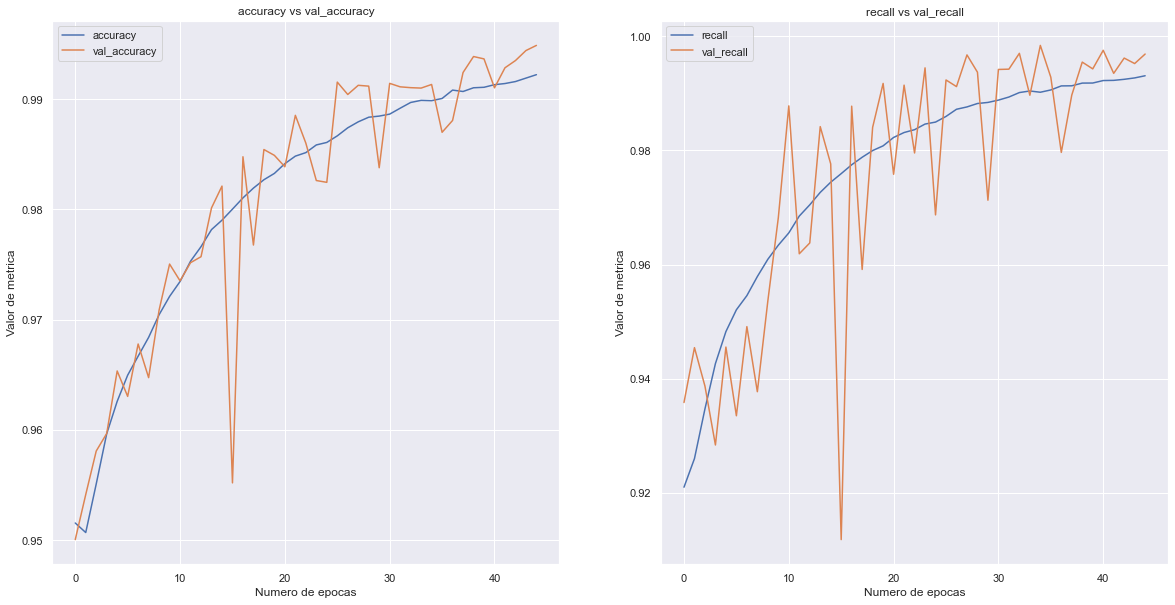

In [165]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

plot_metrics(history.history,metrics=["accuracy","val_accuracy"],ax=ax1)
plot_metrics(history.history,metrics=["recall","val_recall"],ax=ax2)

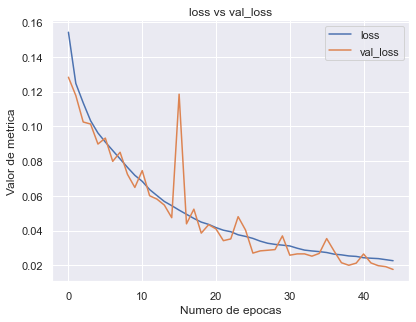

In [166]:
#tenemos la grafica de la funcion de perdida
plot_metrics(history.history,metrics=["loss","val_loss"])

Una vez entrenado el mejor modelo procedemos a realizar la **validacion del modelo**

#### VALIDACION DEL MODELO: MODELO SOBREMUESTREADO

* Veamos como se comporto el modelo durante el entrenamiento y su contraste con los datos de validacion

In [169]:
best_model.evaluate(x_val,y_val)

2479/2479 [==============================] - 2s 834us/step - loss: 0.0176 - accuracy: 0.9949 - recall: 0.9969


[0.01762423664331436, 0.9948809146881104, 0.9968730211257935]

El modelo esta **generalizando muy bien en los datos de validacion** y es algo normal debido a que se entrenó y sintonizó con dichos datos. Pero a diferencia del **modelo base**, esta mucho mejor.

A continuacion veamos las metricas relacionadas a los reportes y la matriz de confusion

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     39656
         1.0       0.99      1.00      0.99     39655

    accuracy                           0.99     79311
   macro avg       0.99      0.99      0.99     79311
weighted avg       0.99      0.99      0.99     79311


 Matriz de confusion


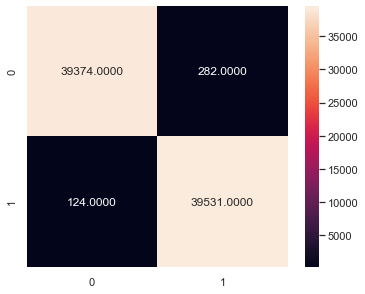

In [168]:
display_report_and_matrix_confusion(best_model,x_val,y_val)

Como era de esperar,  los datos se balancearon y por ello incremento el factor de errores y aciertos.
 Ahora tenemos 124 falsos negativos (transacciones fraudulentas que dejamos ir), como tambien tenemos mas de **35 000 transacciones que identificamos con exito** !
 
 Por otro lado algo de resaltar en este conjunto de validacion es que tenemos mas Falsos positivos que negativos y esta bien.

##### EVALUACION DEL MODELO CON SOBREMUESTREO

* Para ello cargamos los datos de test guardados en otro archivo ./creditcard_oversampling/test.cav

In [170]:
x_test,y_test=load_data("./creditcard_oversampling/test.csv")

In [171]:
x_test=scale_over.transform(x_test)

In [172]:
best_model.evaluate(x_test,y_test)

5311/5311 [==============================] - 6s 1ms/step - loss: 0.0186 - accuracy: 0.9949 - recall: 0.9970


[0.01861482672393322, 0.9949456453323364, 0.9969520568847656]

Excelente!. Tenemos una puntuacion de **Accuracy 99.49%** sobre datos nunca antes vistos y un **Recall de 99.7%**. Desde luego unas excelentes metricas sobre datos de Test

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     84976
         1.0       0.99      1.00      0.99     84976

    accuracy                           0.99    169952
   macro avg       0.99      0.99      0.99    169952
weighted avg       0.99      0.99      0.99    169952


 Matriz de confusion


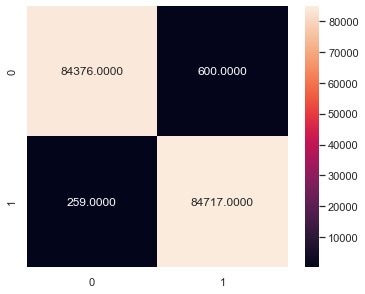

In [173]:
display_report_and_matrix_confusion(best_model,x_test,y_test)

* **TP** (verdadero positivo) : 84376 datos predecidos como positivos correctamente
* **FP** (Falso positivo)     : 600 datos predecidos falsamente como positivos 
* **FN** (Falso Negativo)     : 259 datos predecidos como negativos incorrectamente
* **TN** (verdadero positivo) : 84717 datos predecidos como positivos correctamente

El modelo da resultados excelentes. De mas de 16 000 muestras sobremuestreadas. solo 250 no se detectaron a tiempo, pero en su lugar mas de  80 000 muestras fraudulentas fueron atrapadas exitosamente.

* El modelo tiene una precision del **99% y tasa de recall de 99%**. Desde luego fue un mejor modelo

In [175]:
tf.saved_model.save(best_model,"./best_endpoints/model_oversampling") #guardamos el modelo

INFO:tensorflow:Assets written to: ./best_endpoints/model_oversampling\assets


Las medidas de escalamiento tambien se guardan

In [176]:
import joblib

joblib.dump(scale_over,"./best_endpoints/scaler_oversampling.pkl")

['./best_endpoints/scaler_oversampling.pkl']

### MODELO v2.0 CON DATOS SIN BALANCEAR 

* Esta vez se intentara mejorar el modelo base sin balancear a traves de un sintonizador de hiperparametros

Para ello realizaremos los mismos pasos de carga de datos, separacion y normalizacion de datos

In [196]:
x_train,y_train=load_data("./creditcard_imbalanced/train.csv")
scaler_imbv2,x_train,x_val,y_train,y_val=partition_data(x_train,y_train,with_scale=True,split_size=0.2) #20% de datos de validacion

Una vez obtenido los datos, llamo al sintonizador de hiperparametros,y lo configuro

In [198]:
tuning=kt.Hyperband(
            build_model_tuning,
            objective=kt.Objective("val_recall", direction="max"),
            max_epochs=10,
            factor=3,
            directory="./hipertuning/",
            project_name="creditcard_tuner",
            overwrite=True
        )

In [199]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=10) #si el entrenamiento no mejora siginificativamente durante 10 epocas lo detengo

In [200]:
tuning.search(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_val,y_val),callbacks=[early_stopping])

Trial 30 Complete [00h 00m 36s]
val_recall: 0.7424242496490479

Best val_recall So Far: 0.7727272510528564
Total elapsed time: 00h 08m 11s
INFO:tensorflow:Oracle triggered exit


In [201]:
best_hps=tuning.get_best_hyperparameters(num_trials=1)[0]
print(f"Las mejores neuronas para la capa densa son: {best_hps.get('units')}")

Las mejores neuronas para la capa densa son: 304


Ahora construimos el modelo usando el mejor modelo encontrado

In [202]:
model_imbalanced=tuning.get_best_models(num_models=1)[0]

In [203]:
model_imbalanced.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HIDDEN_LAYER (Dense)         (None, 304)               9120      
_________________________________________________________________
output (Dense)               (None, 1)                 305       
Total params: 9,425
Trainable params: 9,425
Non-trainable params: 0
_________________________________________________________________


#### VALIDACION DEL MODELO: MODELO DESBALANCEADO BASE MEJORADO

Validamos el modelo

In [204]:
loss_val,acc_val,recall_val=model_imbalanced.evaluate(x_val,y_val)

1242/1242 [==============================] - 1s 843us/step - loss: 0.0044 - accuracy: 0.9993 - recall: 0.6756


In [205]:
print(f"Accuracy {acc_val:0.10f}")
print(f"Recall {recall_val:0.10f}")

Accuracy 0.9993076921
Recall 0.7196969986


REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     39656
         1.0       0.80      0.77      0.78        66

    accuracy                           1.00     39722
   macro avg       0.90      0.89      0.89     39722
weighted avg       1.00      1.00      1.00     39722


 Matriz de confusion


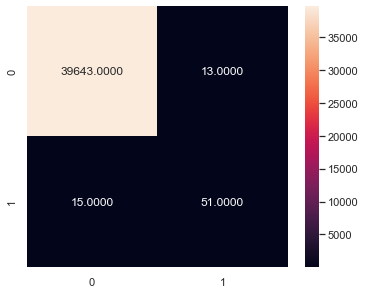

In [206]:
display_report_and_matrix_confusion(model_imbalanced,x_val,y_val)

* Tenemos un **accuracy 99.84%** y un recall (que es nuestro objetivo) de **77%** en los datos de validacion. Mejor que el modelo base en la etapa de validacion

#### EVALUACION DEL MODELO V2

In [207]:
#primero cargamos los datos y escalamos
x_test,y_test=load_data("./creditcard_imbalanced/test.csv")
x_test=scaler_imbv2.transform(x_test)

In [208]:
model_imbalanced.evaluate(x_test,y_test)

2660/2660 [==============================] - 2s 826us/step - loss: 0.0039 - accuracy: 0.9993 - recall: 0.7394


[0.003884269157424569, 0.9992833733558655, 0.7394366264343262]

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     84976
         1.0       0.81      0.74      0.77       142

    accuracy                           1.00     85118
   macro avg       0.91      0.87      0.89     85118
weighted avg       1.00      1.00      1.00     85118


 Matriz de confusion


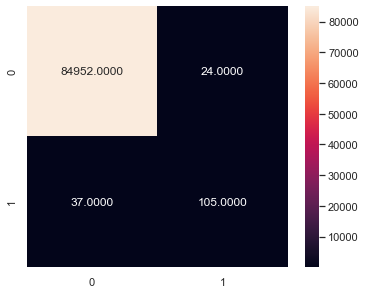

In [209]:
display_report_and_matrix_confusion(model_imbalanced,x_test,y_test)

En comparacion con el modelo base tuvo un **accuracy de 99.9% y un recall superior de 73%** , es mejor que el modelo base.

Obtuvo menor Falsos negativos, pero gano mas falsos positivos, que haran que una transaccion comun sea considerada fraude en al gunos clientes. Es mas sensible al fraude a un costo de ser desconfiado de las verdaderas transacciones confiables

In [210]:
tf.saved_model.save(model_imbalanced,"./best_endpoints/best_model_imbalanced")

INFO:tensorflow:Assets written to: ./best_endpoints/best_model_imbalanced\assets


In [213]:
#los datos de escalamiento tambien se guardan
import joblib
joblib.dump(scaler_imbv2,"./best_endpoints/scaler_best_imbalanced.pkl")

['./best_endpoints/scaler_best_imbalanced.pkl']

### MODELO v3.0 CON DATOS BALANCEADOS POR METODO DE SUBMUESTREO

* Esto nos permite tener la proporcion de clases pertenecientes a fraude y No fraude equilibradas mediante la reduccion de la cantidad de muestras mayoritarias al nivel de clases Minoritarias. Tomelo como el efecto inverso de un Sobre muestreo

In [214]:
#cargamos los datos del sobremuestreo obtenidos en la fase de transformacion de datos/empacado
x_train,y_train=load_data("./creditcard_undersampling/train.csv")
scaler_usmp,x_train,x_val,y_train,y_val=partition_data(x_train,y_train,with_scale=True,split_size=0.2)

Teniendo los datos listos, crearemos el modelo y su sintonizador para obtener los mejores parametros para el entrenamiento

In [215]:
BATCH_SIZE=42
STEP_UNITS=2 #Esta variable se encuentra dentro del las funcion que construye el modelo

In [222]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)

tuning=kt.Hyperband(
            build_model_tuning,
            objective=kt.Objective("val_recall", direction="max"),
            max_epochs=10,
            factor=3,
            directory="./hipertuning/",
            project_name="creditcard_tuner",
            overwrite=True
        )
tuning.search(x_train,y_train,epochs=150,batch_size=BATCH_SIZE,validation_data=(x_val,y_val),callbacks=[early_stopping])

Trial 30 Complete [00h 00m 01s]
val_recall: 0.8181818127632141

Best val_recall So Far: 1.0
Total elapsed time: 00h 00m 36s
INFO:tensorflow:Oracle triggered exit


In [223]:
best_hps=tuning.get_best_hyperparameters(num_trials=1)[0]

In [224]:
print("El mejor numero de neuronas para la capa oculta es de",best_hps.get("units"))

El mejor numero de neuronas para la capa oculta es de 294


Entonces obtenemos la mejor combinacion de hiperparametros y reconstruimos el modelo, ahora con la intencion de obtener el mejor numero de **epochs** para el modelo

In [225]:
#existen dos maneras de hacerlo
model_unsampling=tuning.hypermodel.build(best_hps) #a traves de la construccion de sus mejores hiperparametros
#model_unsampling=tuning.get_best_models(num_models=1)[0] #obteniendo el mejor modelo

La configuracion para la version 3 del modelo es:

In [226]:
model_unsampling.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HIDDEN_LAYER (Dense)         (None, 294)               8820      
_________________________________________________________________
output (Dense)               (None, 1)                 295       
Total params: 9,115
Trainable params: 9,115
Non-trainable params: 0
_________________________________________________________________


* Obtenemos el mejor epochs

In [227]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)
history=model_unsampling.fit(x_train,y_train,epochs=150,batch_size=BATCH_SIZE,validation_data=(x_val,y_val),callbacks=[early_stopping])

Epoch 1/150
13/13 [==============================] - 1s 21ms/step - loss: 0.6647 - accuracy: 0.7110 - recall: 0.4197 - val_loss: 0.6129 - val_accuracy: 0.7444 - val_recall: 0.8636
Epoch 2/150
13/13 [==============================] - 0s 6ms/step - loss: 0.5921 - accuracy: 0.8615 - recall: 0.8106 - val_loss: 0.5504 - val_accuracy: 0.8045 - val_recall: 0.6061
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5445 - accuracy: 0.8314 - recall: 0.6734 - val_loss: 0.5070 - val_accuracy: 0.8346 - val_recall: 0.6667
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4942 - accuracy: 0.8079 - recall: 0.6125 - val_loss: 0.4667 - val_accuracy: 0.8872 - val_recall: 0.7879
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.8898 - recall: 0.7779 - val_loss: 0.4259 - val_accuracy: 0.8797 - val_recall: 0.7576
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.4090 - accuracy: 0.8943 - rec

13/13 [==============================] - 0s 4ms/step - loss: 0.1644 - accuracy: 0.9385 - recall: 0.9233 - val_loss: 0.1742 - val_accuracy: 0.9323 - val_recall: 0.8788
Epoch 92/150
13/13 [==============================] - 0s 4ms/step - loss: 0.1418 - accuracy: 0.9503 - recall: 0.9120 - val_loss: 0.1634 - val_accuracy: 0.9398 - val_recall: 0.8939
Epoch 93/150
13/13 [==============================] - 0s 4ms/step - loss: 0.1670 - accuracy: 0.9309 - recall: 0.8713 - val_loss: 0.1651 - val_accuracy: 0.9323 - val_recall: 0.8939
Epoch 94/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1371 - accuracy: 0.9523 - recall: 0.9146 - val_loss: 0.1631 - val_accuracy: 0.9398 - val_recall: 0.8939
Epoch 95/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.9349 - recall: 0.8969 - val_loss: 0.1641 - val_accuracy: 0.9398 - val_recall: 0.8939
Epoch 96/150
13/13 [==============================] - 0s 5ms/step - loss: 0.1647 - accuracy: 0.9380 - recall: 0.9

In [229]:
#a continuacion extraemos el indice de mayor rendimiento para obtener el epoch
n_epochs=np.argmax(history.history["val_recall"])+1
print("El numero de epochs adecuado es ",n_epochs)

El numero de epochs adecuado es  75


In [230]:
model_unsampling=tuning.hypermodel.build(best_hps) #reconstruimos el modelo
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir="./graph/deteccion_fraude/best_model_unsampling_last/")
history=model_unsampling.fit(x_train,y_train,epochs=n_epochs,batch_size=BATCH_SIZE,validation_data=(x_val,y_val),callbacks=[early_stopping,tensorboard_callback])

Epoch 1/75
13/13 [==============================] - 80s 7s/step - loss: 0.6656 - accuracy: 0.7277 - recall: 0.6944 - val_loss: 0.6042 - val_accuracy: 0.8271 - val_recall: 0.6515
Epoch 2/75
13/13 [==============================] - 0s 6ms/step - loss: 0.5887 - accuracy: 0.7933 - recall: 0.5448 - val_loss: 0.5598 - val_accuracy: 0.9098 - val_recall: 0.8333
Epoch 3/75
13/13 [==============================] - 0s 5ms/step - loss: 0.5392 - accuracy: 0.8993 - recall: 0.8024 - val_loss: 0.5082 - val_accuracy: 0.8421 - val_recall: 0.6818
Epoch 4/75
13/13 [==============================] - 0s 5ms/step - loss: 0.4984 - accuracy: 0.8339 - recall: 0.6646 - val_loss: 0.4642 - val_accuracy: 0.8797 - val_recall: 0.7576
Epoch 5/75
13/13 [==============================] - 0s 5ms/step - loss: 0.4566 - accuracy: 0.8680 - recall: 0.7219 - val_loss: 0.4282 - val_accuracy: 0.9023 - val_recall: 0.8030
Epoch 6/75
13/13 [==============================] - 0s 5ms/step - loss: 0.4133 - accuracy: 0.8876 - recall: 0.

Exploremos los resultados del modelo graficamente

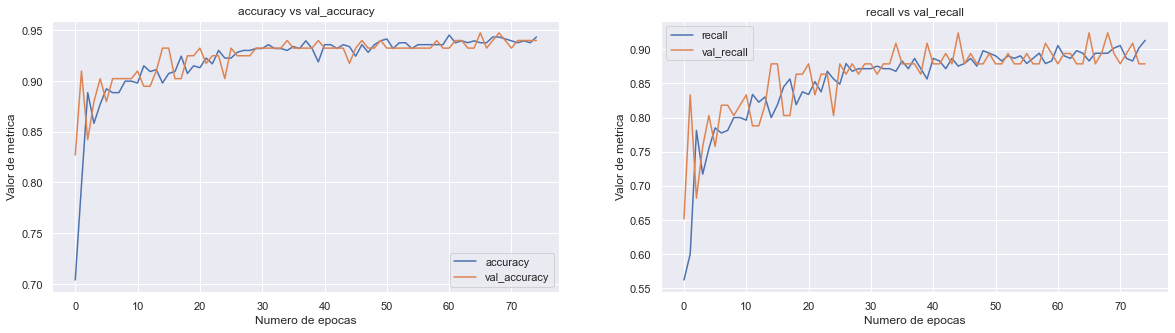

In [234]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))

plot_metrics(history.history,metrics=["accuracy","val_accuracy"],ax=ax1)
plot_metrics(history.history,metrics=["recall","val_recall"],ax=ax2)

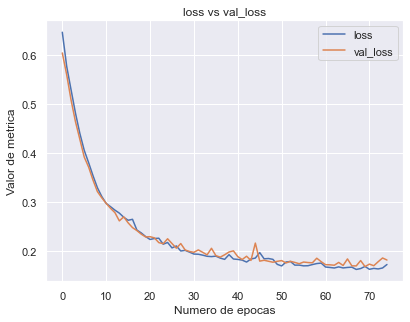

In [244]:
plot_metrics(history.history,metrics=["loss","val_loss"])

#### VALIDACION DEL MODELO: MODELO SUBMUESTREADO

In [235]:
model_unsampling.evaluate(x_val,y_val)

5/5 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 0.9398 - recall: 0.8788


[0.1822652816772461, 0.9398496150970459, 0.8787878751754761]

Se obtuvo una puntuacion **mas alta que del modelo base y modelo base V2**,con un **accuracy 93.98%** que se solventa con un **recall de 87.88%** sobre los datos de validacion

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        67
         1.0       1.00      0.88      0.94        66

    accuracy                           0.94       133
   macro avg       0.95      0.94      0.94       133
weighted avg       0.95      0.94      0.94       133


 Matriz de confusion


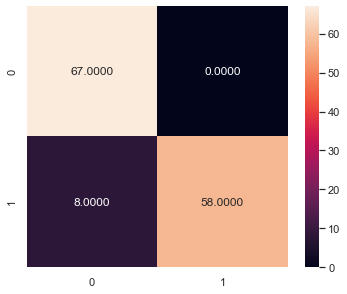

In [236]:
display_report_and_matrix_confusion(model_unsampling,x_val,y_val)

Con esta matriz de confusion podemos determinar que el **submuestreo V3** es mucho mejor que los modelos base y modelo baseV2.

* Los falsos negativos se reducen a 8 unidades, y los falsos positivos a 0. Nosotros buscamos anular los falsos negativos lo mas posible

#### EVALUACION DEL MODELO CON SUBMUESTREO V3

* El conjunto de validacion nos sirve para detener el entrenamiento cuando los resultados son buenos, ahora tendremos que probarlos con el  conjunto de pruebas

In [238]:
x_test,y_test=load_data("./creditcard_undersampling/test.csv")
x_test=scaler_usmp.transform(x_test)

In [239]:
model_unsampling.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9296 - recall: 0.8732


[0.18961967527866364, 0.9295774698257446, 0.8732394576072693]

De hecho estos son resultados muy favorables ya que tenemos un **accuracy 92.9%** y un **recall de 87.3%** wow estos son resultados muy buenos, y mas si lo que buscabamos era un buen rendimiento con la metrica **Recall**

* Ahora veamos la matriz de confusion, nuestro objetivo aqui es ver si  los falsos negativos han reducido

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93       142
         1.0       0.98      0.87      0.93       142

    accuracy                           0.93       284
   macro avg       0.94      0.93      0.93       284
weighted avg       0.94      0.93      0.93       284


 Matriz de confusion


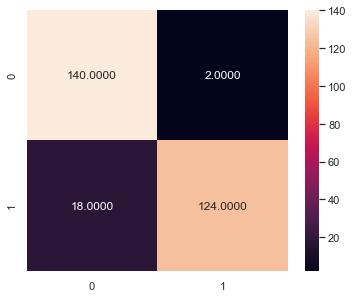

In [240]:
display_report_and_matrix_confusion(model_unsampling,x_test,y_test)

Como el modelo tiene un buen rendimiento optare por guardar el modelo con el formato **SavedModel** para futuras integraciones

In [241]:
tf.saved_model.save(model_unsampling,"./best_endpoints/model_unsampling")

INFO:tensorflow:Assets written to: ./best_endpoints/model_unsampling\assets


In [243]:
#guardamos el metodo escalador
import joblib
joblib.dump(scaler_usmp,"./best_endpoints/scaler_unsampling.pkl")

['./best_endpoints/scaler_unsampling.pkl']

### CONCLUSIONES PARCIALES DE LOS RESULTADOS

Tener en cuenta que se tomo como criterio principal aquel que posee un mayor numero de **recall**  porque el caso de las transacciones son muy criticas

* El mejor modelo fue el de datos sobremuestreados con un puntaje de **99% de accuracy y 99% de recall** sobre datos nunca vistos.

* 2do mejor modelo fue el de datos submuestreados con **92% de accuracy** y **87% de recall**

#### PRUEBA FINAL. EVALUACION EN TODOS LOS DATOS -> No Necesaria

In [20]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf

def test_best_models(X,y,list_components=None):
    
    score_models={
        "accuracy":[],"recall":[],"precision":[],"f1":[]
    }
    
    list_matrix=[]
    
    for path_scaler,path_model in zip(list_components["scalers"],list_components["models"]):
        
        scaler=joblib.load(path_scaler,mmap_mode="r")
        model=tf.keras.models.load_model(path_model)
        x_scaled=scaler.transform(X)
        y_pred=model.predict(x_scaled)
        y_pred=np.where(y_pred>=0.5,1,0)
        
        score_models["accuracy"].append(accuracy_score(y,y_pred))
        score_models["recall"].append(recall_score(y,y_pred))
        score_models["precision"].append(precision_score(y,y_pred))
        score_models["f1"].append(f1_score(y,y_pred))
        
        mat=confusion_matrix(y,y_pred)
        list_matrix.append(mat)
        
    report=pd.DataFrame(score_models,index=list_components["names"])
    
    return report,list_matrix
    

La funcion que preparamos espera un diccionario que posea las rutas de los modelos y los objetos escalers que se usaron sobre los datos

In [16]:
list_components={
    "names":["Base Model","Modelo sobremuestreado","Base Model Mejorado","Modelo Submuestreado"],
    "models":["./best_endpoints/base_model","./best_endpoints/model_oversampling","./best_endpoints/best_model_imbalanced","./best_endpoints/model_unsampling"],
    "scalers":["./best_endpoints/scaler_imbalanced.pkl","./best_endpoints/scaler_oversampling.pkl","./best_endpoints/scaler_best_imbalanced.pkl","./best_endpoints/scaler_unsampling.pkl"]
}

X,y=load_data("./creditcard_imbalanced.csv") #este es el verdadero archivo inicial con los datos verdaderos

Mostramos las comparativas

In [21]:
report,list_matrix=test_best_models(X,y,list_components)

In [22]:
report

,accuracy,recall,precision,f1
Base Model,0.999408,0.706131,0.920110,0.799043
Modelo sobremuestreado,0.992708,0.978858,0.183584,0.309182
Base Model Mejorado,0.999334,0.771670,0.818386,0.794342
Modelo Submuestreado,0.987773,0.873150,0.108059,0.192317


<AxesSubplot:>

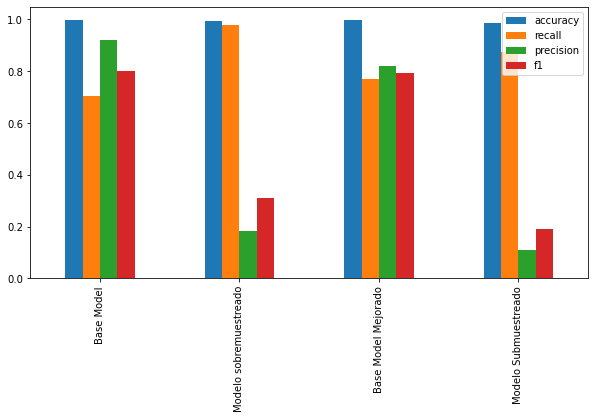

In [26]:
report.plot(kind="bar",figsize=(10,5))

A primera vista es normal pensar que el modelo sobremuestreado no es mejor que el modelo base y otros, pero la verdad es que no es asi, **debemos fijarnos mas en los objetivos del modelo y los datos predecidos**

* **Objetivos iniciales**


* Evitar las transacciones fraudulentas
* Construir un modelo sensible al fraude donde sea preferible clasificar una transaccion normal como sospechosa que dejarla ir y al final sea un fraude que traera costos economicos a la entidad financiera.
* Las transacciones frudulentas deben ser lo mas minimo posible

Ahora veamos los resultados a traves de la matriz de confusion

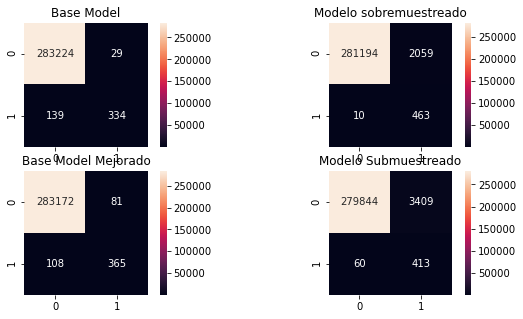

In [33]:
fig,axes=plt.subplots(2,2,figsize=(10,5))

for name,mat,ax in zip(list_components["names"],list_matrix,axes.flat):
    sns.heatmap(mat,annot=True,square=True,fmt="0.0f",ax=ax)
    ax.set_title(name)
plt.show()

Breve explicacion de las metricas bajas:

* **Precision**: Mide intuitivamente la capacidad de no clasificar como positivo una clase que es negativa [tp / (tp + fp)].Por ello la metrica de precision observada en el modelo sobremuestreado es muy baja, por que ha obtenido muchos falsos positivos siendo el modelo sensible a las transacciones fraudulentas

* **f1**: Combina intuitivamente las metricas Recall y Precision

### CONCLUSIONES FINALES

* De hecho se suele pensar que el modelo con mas **accuracy** es el mejor, pero este no siempre es asi. En problemas de ciencia de datos donde es  mejor obtener mas falsos positivos que falsos negativos como es el deteccion de fraude bancario, debemos tener en cuenta todas las metricas, y en este caso el **recall** debido a que si nos fijamos muy bien, el **modelo con datos sobremuestreados** ha sido el modelo que mas **recall** ha tenido y dejo pasar menos transacciones fraudulentas.

* El **modelo sobremuestreado solo tiene 10 Falsos negativos** que el resto de modelos. Esto a coste de que sea mas sensible al fraude y tenga mas Falsos positivos.

* En la vida real tener muchos falsos negativos, que son en este caso transacciones fraudulentas que no identificamos bien, equivalen a millones de soles de perdida de una entidad financiera y mas aun cuando los clientes estan asegurados.

* Los falsos positivos son aquellas transacciones normales que a menudo el modelo reconoce como fraudulenta, y es mejor asi, debido a que nos conviene enviar una confirmacion de la actividad bancaria del cliente por si hay sospechas de la transaccion, a dejarla pasar corriendo el riesgo de que si sea fraudulenta. Esto se llama **Costo del Falso Positivo por Falsos Negativos**

El mejor modelo es el que uso sobremuestreo para obtener un conjunto de datos mas equilibrado, este es el que debe ir a produccion.

In [35]:
model_deploy=tf.keras.models.load_model("./best_endpoints/model_oversampling")


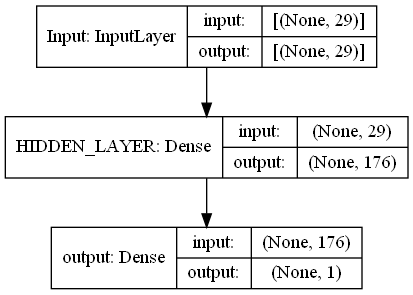

In [36]:
tf.keras.utils.plot_model(model_deploy,"./model_final.png",show_shapes=True)

In [37]:
model_deploy.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HIDDEN_LAYER (Dense)         (None, 176)               5280      
_________________________________________________________________
output (Dense)               (None, 1)                 177       
Total params: 5,457
Trainable params: 5,457
Non-trainable params: 0
_________________________________________________________________


El modelo se puede implementar con **Tensorlow Serving o ML Flow** para asegurar su escalamiento, e inclusive se pueden hacer pruebas de test usando **Flask**.

**Autor**
* Johan valerio Mitma Huaccha, 20 años
* Estudiante de Ing. sistemas en la UNMSM

*Dedicado a mi madre Isabel Huaccha*

*Gracias*

In [39]:
%load_ext tensorboard
%tensorboard --logdir="./graph/fraud_detection/" #visualizacion interactiva de las graficas de los modelos

Reusing TensorBoard on port 6006 (pid 32204), started 1:44:14 ago. (Use '!kill 32204' to kill it.)